In [1]:
import requests
import json
from tqdm import tqdm

In [2]:
url = 'https://api.hh.ru/vacancies?clusters=true'

In [3]:
data = json.loads(requests.get(url).content)
data

{'alternate_url': 'https://hh.ru/search/vacancy?clusters=true&enable_snippets=true',
 'arguments': None,
 'clusters': [{'id': 'area',
   'items': [{'count': 486224,
     'name': 'Россия',
     'url': 'https://api.hh.ru/vacancies?clusters=true&area=113'},
    {'count': 79878,
     'name': 'Москва',
     'url': 'https://api.hh.ru/vacancies?clusters=true&area=1'},
    {'count': 31394,
     'name': 'Московская область',
     'url': 'https://api.hh.ru/vacancies?clusters=true&area=2019'},
    {'count': 30438,
     'name': 'Санкт-Петербург',
     'url': 'https://api.hh.ru/vacancies?clusters=true&area=2'},
    {'count': 24366,
     'name': 'Краснодарский край',
     'url': 'https://api.hh.ru/vacancies?clusters=true&area=1438'},
    {'count': 16218,
     'name': 'Беларусь',
     'url': 'https://api.hh.ru/vacancies?clusters=true&area=16'},
    {'count': 15388,
     'name': 'Свердловская область',
     'url': 'https://api.hh.ru/vacancies?clusters=true&area=1261'},
    {'count': 13694,
     'name'

In [4]:
clusters = [(ind,i['id']) for ind,i in enumerate(data['clusters'])]
clusters

[(0, 'area'),
 (1, 'salary'),
 (2, 'professional_area'),
 (3, 'industry'),
 (4, 'experience'),
 (5, 'employment'),
 (6, 'schedule'),
 (7, 'label')]

In [5]:
data['clusters'][3]['items']

[{'count': 83292,
  'name': 'Розничная торговля',
  'url': 'https://api.hh.ru/vacancies?clusters=true&industry=41'},
 {'count': 49160,
  'name': 'Услуги для бизнеса',
  'url': 'https://api.hh.ru/vacancies?clusters=true&industry=44'},
 {'count': 39420,
  'name': 'Информационные технологии, системная интеграция, интернет',
  'url': 'https://api.hh.ru/vacancies?clusters=true&industry=7'},
 {'count': 35238,
  'name': 'Строительство, недвижимость, эксплуатация, проектирование',
  'url': 'https://api.hh.ru/vacancies?clusters=true&industry=13'},
 {'count': 33629,
  'name': 'Медицина, фармацевтика, аптеки',
  'url': 'https://api.hh.ru/vacancies?clusters=true&industry=48'},
 {'count': 25405,
  'name': 'Финансовый сектор',
  'url': 'https://api.hh.ru/vacancies?clusters=true&industry=43'},
 {'count': 24753,
  'name': 'Товары народного потребления (непищевые)',
  'url': 'https://api.hh.ru/vacancies?clusters=true&industry=42'},
 {'count': 23992,
  'name': 'Продукты питания',
  'url': 'https://api.h

In [6]:
industry = [(i['url'].split('&')[1],i['name'])
                     for i in data['clusters'][3]['items']]
industry

[('industry=41', 'Розничная торговля'),
 ('industry=44', 'Услуги для бизнеса'),
 ('industry=7', 'Информационные технологии, системная интеграция, интернет'),
 ('industry=13', 'Строительство, недвижимость, эксплуатация, проектирование'),
 ('industry=48', 'Медицина, фармацевтика, аптеки'),
 ('industry=43', 'Финансовый сектор'),
 ('industry=42', 'Товары народного потребления (непищевые)'),
 ('industry=27', 'Продукты питания'),
 ('industry=5', 'Перевозки, логистика, склад, ВЭД'),
 ('industry=388',
  'Промышленное оборудование, техника, станки и комплектующие'),
 ('industry=8',
  'Электроника, приборостроение, бытовая техника, компьютеры и оргтехника'),
 ('industry=24', 'Металлургия, металлообработка'),
 ('industry=9', 'Телекоммуникации, связь'),
 ('industry=15', 'Автомобильный бизнес'),
 ('industry=50', 'Гостиницы, рестораны, общепит, кейтеринг'),
 ('industry=11', 'СМИ, маркетинг, реклама, BTL, PR, дизайн, продюсирование'),
 ('industry=47', 'Нефть и газ'),
 ('industry=39', 'Образовательные

In [7]:
professional_area = [(i['url'].split('&')[1],i['name'])
                     for i in data['clusters'][2]['items']]
professional_area

[('specialization=17', 'Продажи'),
 ('specialization=13', 'Медицина, фармацевтика'),
 ('specialization=29', 'Рабочий персонал'),
 ('specialization=18', 'Производство, сельское хозяйство'),
 ('specialization=1', 'Информационные технологии, интернет, телеком'),
 ('specialization=20', 'Строительство, недвижимость'),
 ('specialization=21', 'Транспорт, логистика'),
 ('specialization=15', 'Начало карьеры, студенты'),
 ('specialization=4', 'Административный персонал'),
 ('specialization=5', 'Банки, инвестиции, лизинг'),
 ('specialization=2', 'Бухгалтерия, управленческий учет, финансы предприятия'),
 ('specialization=3', 'Маркетинг, реклама, PR'),
 ('specialization=8', 'Безопасность'),
 ('specialization=22', 'Туризм, гостиницы, рестораны'),
 ('specialization=7', 'Автомобильный бизнес'),
 ('specialization=6', 'Управление персоналом, тренинги'),
 ('specialization=12', 'Консультирование'),
 ('specialization=16', 'Государственная служба, некоммерческие организации'),
 ('specialization=9', 'Высший 

In [8]:
url = 'https://api.hh.ru/vacancies?page={}&area=1&industry={}&specialization=18'

In [9]:
from bs4 import BeautifulSoup

In [10]:
info_industry = [i[0].split('=')[1] for i in industry]
info_spec = [i[0].split('=')[1] for i in professional_area]
info_industry

['41',
 '44',
 '7',
 '13',
 '48',
 '43',
 '42',
 '27',
 '5',
 '388',
 '8',
 '24',
 '9',
 '15',
 '50',
 '11',
 '47',
 '39',
 '33',
 '34',
 '36',
 '29',
 '45',
 '49',
 '46',
 '51',
 '19',
 '389',
 '37',
 '52']

In [11]:
responsibilities = []
wv = []
skills = []
for ind in info_industry:
    for i in tqdm(range(1)):
        try:
            content = json.loads(requests.get(url.format(i,ind)).content)
            for item in content['items']:
                description = json.loads(requests.get(item['url']).content)
                parsed_vacancy = BeautifulSoup(description['description'])

                strongs = parsed_vacancy.find_all('strong')
                uls = parsed_vacancy.find_all('ul')

                for p,s in enumerate(strongs):
                    if s.text.lower().find('обязанно') > -1:        
                        for resp in uls[p].find_all('li'):
                            responsibilities.append((resp.text.lower(),description['name'].lower()))
                    elif s.text.lower().find('требо') > -1:
                        for skill in uls[p].find_all('li'):
                            skills.append((skill.text.lower(),description['name'].lower()))
        except:
            print('some error')

  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


100%|██████████| 1/1 [00:00<00:00,  5.21it/s]

some error
some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


  0%|          | 0/1 [00:00<?, ?it/s]

some error


100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

some error


In [12]:
skills

[('опыт работы желателен', 'оператор печного отделения'),
 ('оператором линии на производстве не менее 6 месяцев.',
  'оператор линии в производстве пищевой продукции'),
 ('опыт работы: от 2 – х лет на аналогичной должности.',
  'менеджер по работе с клиентами (мебель)'),
 ('образование: высшее техническое.',
  'менеджер по работе с клиентами (мебель)'),
 ('уверенный пользователь пк: ms office (excel обязательно), 1с, интернет, электронная почта, autocad (чтение и небольшие правки).',
  'менеджер по работе с клиентами (мебель)'),
 ('высшее техническое образование;', 'инженер-верификатор'),
 ('знание основных архитектур современных микропроцессоров;',
  'инженер-верификатор'),
 ('опыт программирования на с/с++;', 'инженер-верификатор'),
 ('знание основных принципов верификации и тестирования;',
  'инженер-верификатор'),
 ('необходимо иметь представление об ovm/uvm, tlm;', 'инженер-верификатор'),
 ('желателен опыт работы с systemc или systemverilog;', 'инженер-верификатор'),
 ('понимание

In [13]:
jobs = {}
for skill in skills:
    if skill[1] not in jobs:
        jobs[skill[1]] = ([],[])
    jobs[skill[1]][0].append(skill[0])

for resp in responsibilities :
    if resp[1] not in jobs:
        jobs[resp[1]] = ([],[])
    jobs[resp[1]][1].append(resp[0])

In [14]:
jobs

{'electrical engineer': ([' bachelor/masters degree in engineering with minimum 10-year experience in electrical engineering design for oil & gas / petrochemical industry ',
   ' strong knowledge of industry codes and standards, with a deep focus on standard and laws applicable to russian federation ',
   ' availability to travel to site for field walks, client meetings, etc ',
   ' good communication and problem-solving skills ',
   ' ability to cope with conflicting deadlines, frequent interruptions and multiple tasks '],
  ['being in charge of producing documents and deliverables assigned to him/her by the project leader guaranteeing the quality, the assigned budget and time;',
   ' being appointed to tasks with different technical complexity and requiring different levels of skill; coordination of other engineers and/or draftsmen can be implied ',
   ' guarantee the quality of the generated deliverables and their compliance with the contractual and company standards, procedures and

In [15]:
for job in jobs:
    print(job, '\n', jobs[job][0], '\n', jobs[job][1], '\n\n')

оператор печного отделения 
 ['опыт работы желателен', 'опыт работы желателен'] 
 ['смазка тестовых заготовок, контроль за расслойкой тестовых заготовок, выпечка в печи и на линиях.', 'смазка тестовых заготовок, контроль за расслойкой тестовых заготовок, выпечка в печи и на линиях.'] 


оператор линии в производстве пищевой продукции 
 ['оператором линии на производстве не менее 6 месяцев.', 'оператором линии на производстве не менее 6 месяцев.'] 
 ['работа на производственной линии, упаковочных автоматах.', 'работа на производственной линии, упаковочных автоматах.'] 


менеджер по работе с клиентами (мебель) 
 ['опыт работы: от 2 – х лет на аналогичной должности.', 'образование: высшее техническое.', 'уверенный пользователь пк: ms office (excel обязательно), 1с, интернет, электронная почта, autocad (чтение и небольшие правки).'] 
 ['прием и обработка заявок клиентов.', 'составление спецификаций для заказчиков.', 'размещение заказов на производство.', 'организация отгрузок.', 'составле

In [16]:
len(jobs)

143

In [17]:
import nltk
nltk.download("stopwords")

from pymystem3 import Mystem
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
m = Mystem()
ru_stopwords = stopwords.words("russian")

def process(text):
    tokens = m.lemmatize(text.lower())
    words = [token for token in tokens if token.isalpha()
            and token not in ru_stopwords]
    return words
print(skills[0][0])
process(skills[0][0])

опыт работы желателен


['опыт', 'работа', 'желательный']

In [19]:
#processed_dict = {}
#for skill in skills:
    #job = skill[1]
    #if job not in processed_dict:
        #processed_dict[job] = []
    #processed_dict[job] += process(skill[0])
#for resp in responsibilities:
    #processed_text.append(process(resp[0]))
#processed_dict

In [20]:
processed_text = []
for skill in skills:
    processed_text.append(process(skill[0]))
for resp in responsibilities:
    processed_text.append(process(resp[0]))
processed_text

[['опыт', 'работа', 'желательный'],
 ['оператор', 'линия', 'производство', 'менее', 'месяц'],
 ['опыт', 'работа', 'х', 'год', 'аналогичный', 'должность'],
 ['образование', 'высокий', 'технический'],
 ['уверенный',
  'пользователь',
  'пк',
  'ms',
  'office',
  'excel',
  'обязательно',
  'интернет',
  'электронный',
  'почта',
  'autocad',
  'чтение',
  'небольшой',
  'правка'],
 ['высокий', 'технический', 'образование'],
 ['знание', 'основной', 'архитектура', 'современный', 'микропроцессор'],
 ['опыт', 'программирование'],
 ['знание', 'основной', 'принцип', 'верификация', 'тестирование'],
 ['необходимо', 'иметь', 'представление', 'ovm', 'uvm', 'tlm'],
 ['желательный', 'опыт', 'работа', 'systemc', 'systemverilog'],
 ['понимание', 'скрипт', 'perl', 'python', 'tcl', 'bash', 'makefile'],
 ['опыт', 'работа', 'система', 'redmine', 'bugzilla', 'subversion'],
 ['знание', 'английский', 'язык', 'чтение', 'профессиональный', 'литература'],
 ['высокий', 'профильный', 'образование'],
 ['опыт', 'п

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.cluster import KMeans
#from sklearn.metrics import adjusted_rand_score
from gensim.models import Word2Vec

unable to import 'smart_open.gcs', disabling that module


In [22]:
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(processed_text)


#true_k = 4
#model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=10)
#model.fit(X)
#y_km = model.fit_predict(X)

C:\Users\yaro\PycharmProjects\HSE\venv\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
C:\Users\yaro\PycharmProjects\HSE\venv\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


1427


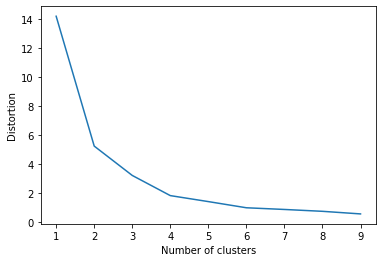

In [23]:
m = Word2Vec (processed_text, size=50 ,min_count = 1, sg = 1)

def vectorizer(sent,m):
    vec = []
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                vec = m[w]
            else:
                vec = np.add(vec,m[w])
            numw += 1
        except:
            pass
        
    return np.asarray(vec) / numw

l= []
for i in range(0,370):
    l.append(vectorizer(processed_text[i],m))
X = np.array(l)
print(len(processed_text))

#plt.scatter(X[0],X[50], label='True Position')

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

distortions = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=1, max_iter=100)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 10), distortions)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [28]:
k = 4
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
labels = model.fit_predict(X)
print(labels)
for ind, sent in enumerate(processed_text[:370]):
    print(str(labels[ind]) + ":" + str(sent))

[3 1 0 0 1 0 1 1 0 2 1 2 0 0 1 0 0 1 1 0 0 3 0 0 2 1 1 1 0 0 0 2 2 2 2 1 1
 1 2 1 1 1 1 1 1 2 0 1 0 3 0 1 0 2 1 0 3 2 3 0 1 2 1 0 0 3 0 1 0 0 3 0 0 1
 0 1 0 0 1 1 1 0 2 2 0 0 0 2 0 1 1 1 3 0 0 1 0 0 0 0 0 1 0 3 0 3 0 3 0 1 1
 3 0 1 0 3 1 1 0 0 3 3 3 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 2 0 0 0 0 0 0
 0 0 1 1 3 3 0 0 3 0 3 1 3 0 1 0 1 0 0 0 0 1 2 1 2 0 3 0 1 3 0 0 1 3 0 0 1
 1 1 0 1 0 1 0 0 0 0 3 0 3 1 2 0 2 0 2 1 1 3 1 3 1 0 0 2 1 0 1 0 1 1 3 1 1
 1 0 1 1 3 2 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 2 0 2 0 0 2 0 0 1 1 3
 0 0 1 1 1 1 1 1 1 2 0 1 1 0 0 1 1 1 0 2 1 3 2 0 3 1 0 0 1 1 2 2 1 1 0 0 2
 1 2 0 1 0 0 2 2 2 1 1 2 3 1 1 0 3 0 3 0 3 2 2 1 1 3 2 1 0 1 1 1 2 2 2 2 1
 1 2 2 2 2 1 3 0 0 0 0 3 1 0 0 1 0 3 0 0 3 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1]
3:['опыт', 'работа', 'желательный']
1:['оператор', 'линия', 'производство', 'менее', 'месяц']
0:['опыт', 'работа', 'х', 'год', 'аналогичный', 'должность']
0:['образование', 'высокий', 'технический']
1:['уверенный', 'пользователь', 'пк', 'ms', 'offic

In [30]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:


AttributeError: 'function' object has no attribute 'get_feature_names'

In [ ]:
print("Prediction")
X = vectorizer.transform(["английский"])
predicted = model.predict(X)
print(predicted)